Данные по титанику скачал отсюда:  
https://www.kaggle.com/c/titanic/data

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

Грузим что есть

In [61]:
df_train = pd.read_csv('titanic/train.csv')
df_test = pd.read_csv('titanic/test.csv')
df_gender_submission = pd.read_csv('titanic/gender_submission.csv')

In [62]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [63]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [64]:
df_test.shape

(418, 11)

In [65]:
df_gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [66]:
df_gender_submission.shape

(418, 2)

### Это определенно задумано, как работа с тестом. Количество совпадает. Это для проверки вырезали целевую переменную. 

Добавим фичу, о принадлежности к трейну или тесту (первичное разбиение).

In [67]:
df_train['IsTrain'] = True
df_test['IsTrain'] = False

###  Соединим данные. Будет первоначальный датасет.  
### Если надо, впоследствии разобъём иначе, чем предлагает Kaggle.

In [68]:
df_full = pd.concat([df_train, df_test])
df_full.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsTrain
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,True


In [69]:
df_full.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


---

In [70]:
### Будем работать с df_train. Если на

Проверим, что чем выше социальный статус, тем больше вероятность спасения. Проверим это построив зависимость количества спасишихся и утонувших по классам:

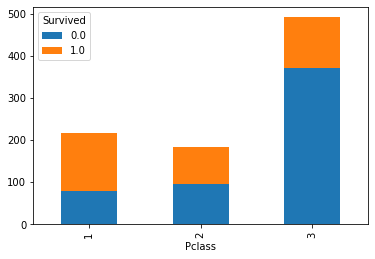

In [71]:
df_full.pivot_table('PassengerId', 'Pclass', 'Survived', 'count').plot(kind='bar', stacked=True)

Верно!

---

Посмотрим, как количество родственнников влияет на факт спасения:

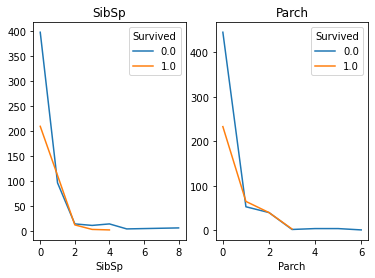

In [72]:
fig, axes = plt.subplots(ncols=2)
df_full.pivot_table('PassengerId', ['SibSp'], 'Survived', 'count').plot(ax=axes[0], title='SibSp')
df_full.pivot_table('PassengerId', ['Parch'], 'Survived', 'count').plot(ax=axes[1], title='Parch')

Верно!

---

Столбец с номерами кают. Насколько пригодятся данные?

In [73]:
df_full.PassengerId[df_train.Cabin.notnull()].count()

296

In [74]:
df_full.shape

(1309, 13)

Поле практически не заполнено, можно опустить.

---

Поле Age (возраст), насколько заполнен:

In [75]:
df_full.PassengerId[df_full.Age.notnull()].count()

1046

Данное поле практически все заполнено. Есть пустые занчения. Зададим это поле медианой по полю:

In [76]:
df_full.Age = df_full.Age.median()

---

Поле Embarked, в котором находится порт посадки. Проверим есть ли пассажиры у которых порт не указан:

In [77]:
df_full[df_full.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsTrain
61,62,1.0,1,"Icard, Miss. Amelie",female,28.0,0,0,113572,80.0,B28,NaN,True
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,28.0,0,0,113572,80.0,B28,NaN,True


Таких пассажиров двое. Присвоим этим пассажирам порт в котором село больше всего людей:

In [78]:
MaxPassEmbarked = df_full.groupby('Embarked').count()['PassengerId']
df_full.Embarked[df_full.Embarked.isnull()] = MaxPassEmbarked[MaxPassEmbarked == MaxPassEmbarked.max()].index[0]

---

Поле цена (Fare):

In [79]:
df_full.PassengerId[df_full.Fare.isnull()]

152    1044
Name: PassengerId, dtype: int64

In [80]:
df_full[df_full.PassengerId==1044]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsTrain
152,1044,NaN,3,"Storey, Mr. Thomas",male,28.0,0,0,3701,NaN,NaN,S,False


In [81]:
df_full.Fare[df_full.PassengerId==1044]

152   NaN
Name: Fare, dtype: float64

Заменим медианой:

In [82]:
df_full.Fare.median()

14.4542

In [83]:
df_full.Fare[df_full.PassengerId==1044] = df_full.Fare.median()

Пренебрежем полями 'PassengerId', 'Name','Ticket','Cabin' ...

In [84]:
df_full = df_full.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

Теперь наш набо выглядит так:

In [85]:
df_full.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,IsTrain
0,0.0,3,male,28.0,1,0,7.2500,S,True
1,1.0,1,female,28.0,1,0,71.2833,C,True
2,1.0,3,female,28.0,0,0,7.9250,S,True
3,1.0,1,female,28.0,1,0,53.1000,S,True
4,0.0,3,male,28.0,0,0,8.0500,S,True


И созданным полем 'IsTrain' (в первом исполнении работы с данными по методу CRISP - DM)

In [86]:
### df_full = df_full.drop(['IsTrain'],axis=1) ### Нет, так не поступим.

In [87]:
df_full.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,IsTrain
0,0.0,3,male,28.0,1,0,7.2500,S,True
1,1.0,1,female,28.0,1,0,71.2833,C,True
2,1.0,3,female,28.0,0,0,7.9250,S,True
3,1.0,1,female,28.0,1,0,53.1000,S,True
4,0.0,3,male,28.0,0,0,8.0500,S,True


In [88]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1309 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1309 non-null   float64
 7   Embarked  1309 non-null   object 
 8   IsTrain   1309 non-null   bool   
dtypes: bool(1), float64(3), int64(3), object(2)
memory usage: 93.3+ KB


В поле Survived есть NaN значения. Но дерево решений может работать с пропущенными данными. Проверим.

Воспользуемся LabelEncoder для соответствующих полей:

In [89]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
dicts = {}

label.fit(df_full.Sex.drop_duplicates())
dicts['Sex'] = list(label.classes_)
df_full.Sex = label.transform(df_full.Sex)

label.fit(df_full.Embarked.drop_duplicates())
dicts['Embarked'] = list(label.classes_)
df_full.Embarked = label.transform(df_full.Embarked)

В итоге наши данные выглядят следующим образом:

In [90]:
df_full.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,IsTrain
0,0.0,3,1,28.0,1,0,7.2500,2,True
1,1.0,1,0,28.0,1,0,71.2833,0,True
2,1.0,3,0,28.0,0,0,7.9250,2,True
3,1.0,1,0,28.0,1,0,53.1000,2,True
4,0.0,3,1,28.0,0,0,8.0500,2,True


---

Разделим данные снова на обучающую и тестовую выборку с помощью флага. И дропнем соответсвующую колонку.

In [91]:
df_train = df_full[df_full.IsTrain].drop(columns=['IsTrain'])
df_test = df_full[~df_full.IsTrain].drop(columns=['IsTrain'])

---

## 1. Обучаем дерево решений.

In [92]:
X_train = df_train.loc[:, df_train.columns != 'Survived']
y_train = df_train.loc[:, df_train.columns == 'Survived']
X_test = df_test.loc[:, df_test.columns != 'Survived']
y_test = df_test.loc[:, df_test.columns == 'Survived']

In [93]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [94]:
clf = DecisionTreeClassifier(max_depth=4)

In [95]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [96]:
y_train_pred = clf.predict(X_train)
accuracy_score(y_train, y_train_pred)

0.8181818181818182

In [97]:
clf.feature_importances_

array([0.15623513, 0.62380649, 0.        , 0.0235538 , 0.0444715 ,
       0.13693259, 0.0150005 ])

In [98]:
X_train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

При глубине дерева, равной 4, самый важный атрибут оказался 'Sex'.

### 2. Подбираем оптимальную глубину дерева.

In [99]:
from sklearn.model_selection import GridSearchCV

In [100]:
depths = np.arange(1, 10)
criterions= ['gini', 'entropy']
features_num = np.arange(1, 10)
nodes = np.arange(2, 50)

grid = {'max_depth': depths,
        'criterion': criterions,
        'max_features': features_num,
        'max_leaf_nodes': nodes,
        }

gridsearch = GridSearchCV(clf, grid, scoring='accuracy', cv=5, n_jobs=3)

gridsearch.fit(X_train, y_train)
gridsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 5,
 'max_leaf_nodes': 32}

In [101]:
gridsearch.cv_results_

{'mean_fit_time': array([0.00418882, 0.00398936, 0.00339112, ..., 0.00299206, 0.00339079,
        0.00319123]),
 'std_fit_time': array([9.77174739e-04, 1.54520290e-03, 4.88539009e-04, ...,
        1.90734863e-07, 4.88519308e-04, 3.98874411e-04]),
 'mean_score_time': array([0.001197  , 0.00139618, 0.0009975 , ..., 0.        , 0.        ,
        0.        ]),
 'std_score_time': array([3.99279662e-04, 4.88811327e-04, 7.44843452e-07, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', ..., 'entropy', 'entropy',
                    'entropy'],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[1, 1, 1, ..., 9, 9, 9],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_features': masked_array(data=[1, 1, 1, ..., 9, 9, 9],
           

Оптимальная глубина дерева равна 8.

In [102]:
clf_final = DecisionTreeClassifier(max_depth=8)

In [103]:
clf_final.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### 3. Самые важные фичи.

In [104]:
clf_final.feature_importances_

array([0.12385578, 0.47779811, 0.        , 0.03448043, 0.05014079,
       0.27860771, 0.03511718])

In [105]:
X_train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

По-прежнему самый важный атрибут это 'Sex' (пол).

### 4. Визуализируем полученное дерево.

In [115]:
!pip install pydotplus

In [107]:
from sklearn.tree import export_graphviz

def get_tree_dot_view(clf, feature_names=None, class_names=None):
    print(export_graphviz(clf, out_file=None, filled=True, feature_names=feature_names, class_names=class_names))

In [122]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf_final, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns, class_names=['Lost','Saved'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

In [123]:
graph

In [124]:
#pip install pydot

Как поставить graphviz в Windows 10  
http://diginal.ru/python/narisovat-graf-s-graphviz-v-jupyter-notebook/

In [52]:
#pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [54]:
#conda install python-graphviz

Solving environment: ...working... done

## Package Plan ##

  environment location: D:\ProgramData\Anaconda3

  added / updated specs:
    - python-graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    graphviz-2.38              |       hfd603c8_2        29.3 MB
    python-graphviz-0.14       |             py_0          25 KB
    ------------------------------------------------------------
                                           Total:        29.3 MB

The following NEW packages will be INSTALLED:

  graphviz           pkgs/main/win-64::graphviz-2.38-hfd603c8_2
  python-graphviz    pkgs/main/noarch::python-graphviz-0.14-py_0




graphviz-2.38        | 29.3 MB   |            |   0% 
graphviz-2.38        | 29.3 MB   |            |   0% 
graphviz-2.38        | 29.3 MB   | 1          |   1% 
graphviz-2.38        | 29.3 MB   | 4          |   4% 
graphviz-2.38        | 29.3 MB   | 7   

In [111]:
import sys
sys.path #можно посмотреть что в PATH
graphviz_path = 'D:\\ProgramData\\Anaconda3\\Library\\bin\\graphviz'  #не забыть поправить ... и поставить двойные юниксовые слеши
#sys.path.insert(0, graphviz_path)
#sys.path.remove(graphviz_path) - если что-то пошло не так и путь нужно удалить
!dot -V  #проверить, что всё работает - должен вывести версию graphviz
#http://diginal.ru/python/narisovat-graf-s-graphviz-v-jupyter-notebook/

dot - graphviz version 2.38.0 (20140413.2041)


In [116]:
!pydotplus -V

"pydotplus" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


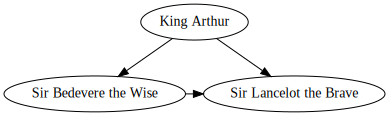

In [114]:
from graphviz import Digraph
dot = Digraph(comment='The Round Table')
dot.node('A', 'King Arthur')
dot.node('B', 'Sir Bedevere the Wise')
dot.node('L', 'Sir Lancelot the Brave')
dot.edges(['AB', 'AL'])
dot.edge('B', 'L', constraint='false')
dot

In [118]:
graph.write_png("file.png")

InvocationException: GraphViz's executables not found

In [125]:
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=17)
clf_tree.fit(X_train, y_train)

from sklearn import tree
from IPython.display import Image
import pydotplus

dot_data = tree.export_graphviz(clf_tree, feature_names=df_train.columns, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf('df_train.pdf')
graph.write_png('df_train.png')
Image(graph.create_png())

In [130]:
get_tree_dot_view(clf_final, list(X_train), list(label.classes_))

digraph Tree {
node [shape=box, style="filled", color="black"] ;
0 [label="Sex <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]\nclass = C", fillcolor="#f5cfb4"] ;
1 [label="Pclass <= 2.5\ngini = 0.383\nsamples = 314\nvalue = [81, 233]\nclass = Q", fillcolor="#7ebfee"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="Fare <= 28.856\ngini = 0.1\nsamples = 170\nvalue = [9, 161]\nclass = Q", fillcolor="#44a2e6"] ;
1 -> 2 ;
3 [label="Fare <= 28.231\ngini = 0.18\nsamples = 70\nvalue = [7, 63]\nclass = Q", fillcolor="#4fa8e8"] ;
2 -> 3 ;
4 [label="Parch <= 1.5\ngini = 0.159\nsamples = 69\nvalue = [6, 63]\nclass = Q", fillcolor="#4ca6e7"] ;
3 -> 4 ;
5 [label="SibSp <= 0.5\ngini = 0.183\nsamples = 59\nvalue = [6, 53]\nclass = Q", fillcolor="#4fa8e8"] ;
4 -> 5 ;
6 [label="Fare <= 13.25\ngini = 0.136\nsamples = 41\nvalue = [3, 38]\nclass = Q", fillcolor="#49a5e7"] ;
5 -> 6 ;
7 [label="Embarked <= 1.5\ngini = 0.211\nsamples = 25\nvalue = [3, 22]\nclass = Q", fillco